### About Dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

We can also find the dataset over kaggle.com: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset?sort=published


### About columns (Information provided by the owner)
loan_id

no_of_dependents: Number of Dependents of the Applicant

education: Education of the Applicant (Graduate/Not Graduate)

self_employed: Employment Status of the Applicant

income_annum: Annual Income of the Applicant

loan_amount: Loan Amount

loan_term: Loan Term in Years

cibil_score: Credit Score

residential_assets_value

commercial_assets_value

luxury_assets_value

bank_asset_value

loan_status: Loan Approval Status (Approved/Rejected)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as w
w.filterwarnings(action = 'ignore')

In [4]:
## Reading the DataFrame

df = pd.read_csv(r"C:\Users\hs081\Downloads\loan_approval_dataset.csv")

In [5]:
## Displaying top 5 records from the dataset

df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

## Basic Detaling of the Dataset

In [6]:
## Taking basic information from the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
## Displaying the Datatyes 

df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
## Name of Columns in the dataset

df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
## Column Renaming

df.columns = df.columns.str.strip()

In [10]:
## Again Displaying the Names of Columns in the dataset

df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
## Shape of the Dataset(Train)

df.shape

(4269, 13)

In [12]:
## Number Summary for the Numerical Columns

df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [13]:
## Checking for duplicate values in the Dataset

df.duplicated().sum()

0

In [14]:
## Checking No of Unqiue Values in the Dataset

df.nunique()

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

In [15]:
## Checking for Null Values in the Dataset

df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [16]:
## Data Reduction (Dropping Columns that doesn't paly any role in prediction)

df.drop('loan_id' , axis = 1 , inplace = True)

In [17]:
## After Droping Columns Displaying the Dataset

df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

In [18]:
## checking for Imbalance Dataset 

df['loan_status'].value_counts() / len(df) * 100 

 Approved    62.215976
 Rejected    37.784024
Name: loan_status, dtype: float64

### Conclusion

(1). There is no null value and duplicated value in this dataset.

(2). no_of_dependents, education, self_employed and loan_status are categorical columns.

(3). There are a total 4269 rows in this dataset, with 13 columns (features).

(4). loan_status which is about 62.2%  "Approved" and 37.7% Data is about "Rejected". The dataset is
slightly imbalanced but it is acceptable and we don't need to rebalance it.

(6). Other columns are numerical.

## EDA (Exploratory Data Analysis)

1 Univariate Analysis 

2 Bi variate Analysis

3 Multi Variate Analysis

In [19]:
## Segregating Numerical and Categorical Columns

df_cat = df.select_dtypes(include = 'object')
df_num  = df.select_dtypes(exclude = 'object')

In [20]:
df_cat.sample()

education self_employed loan_status
2529   Not Graduate           Yes    Rejected

In [21]:
df_num.sample()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
2525                 5       3900000      8300000         18          600   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
2525                   3900000                   600000             10400000   

      bank_asset_value  
2525           5600000

### Univariate Analysis for numerical Columns

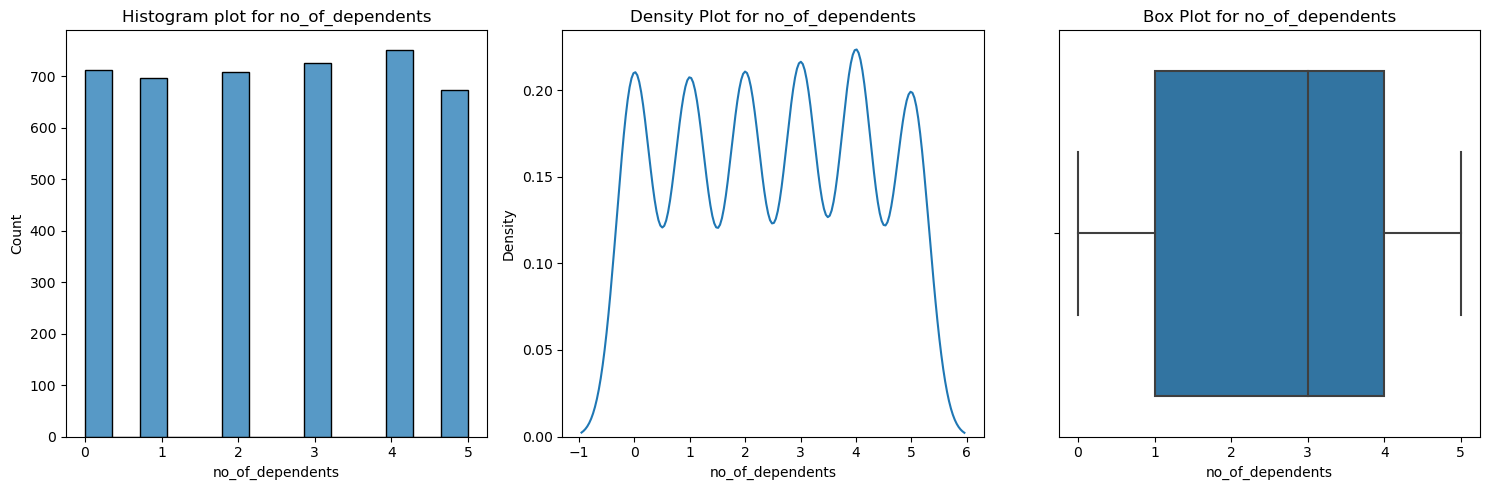

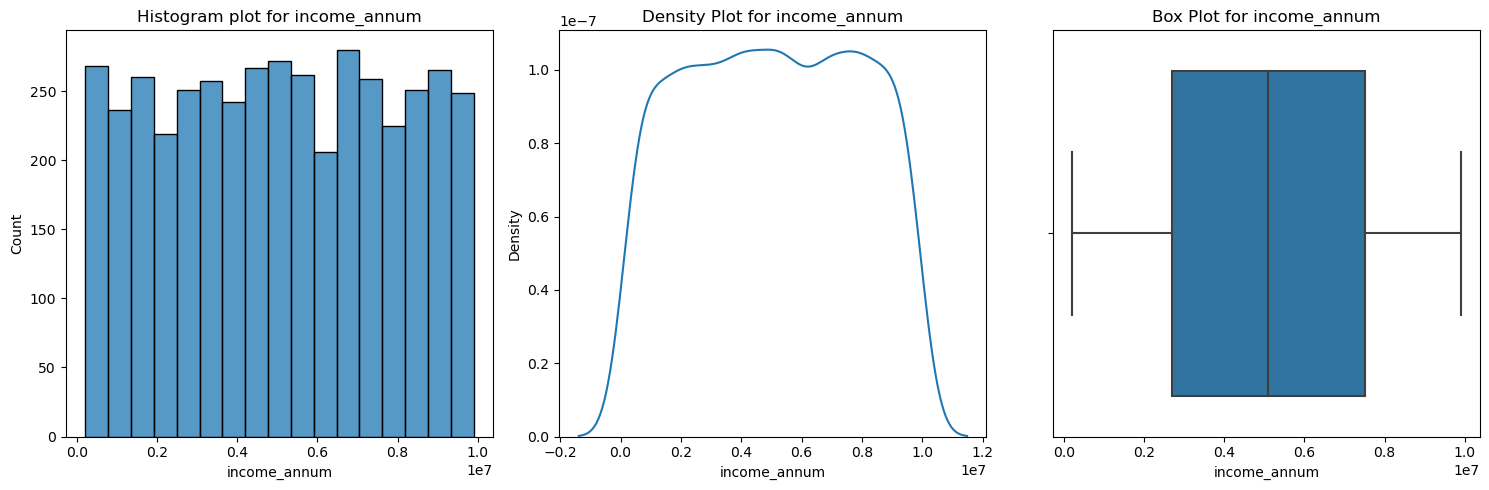

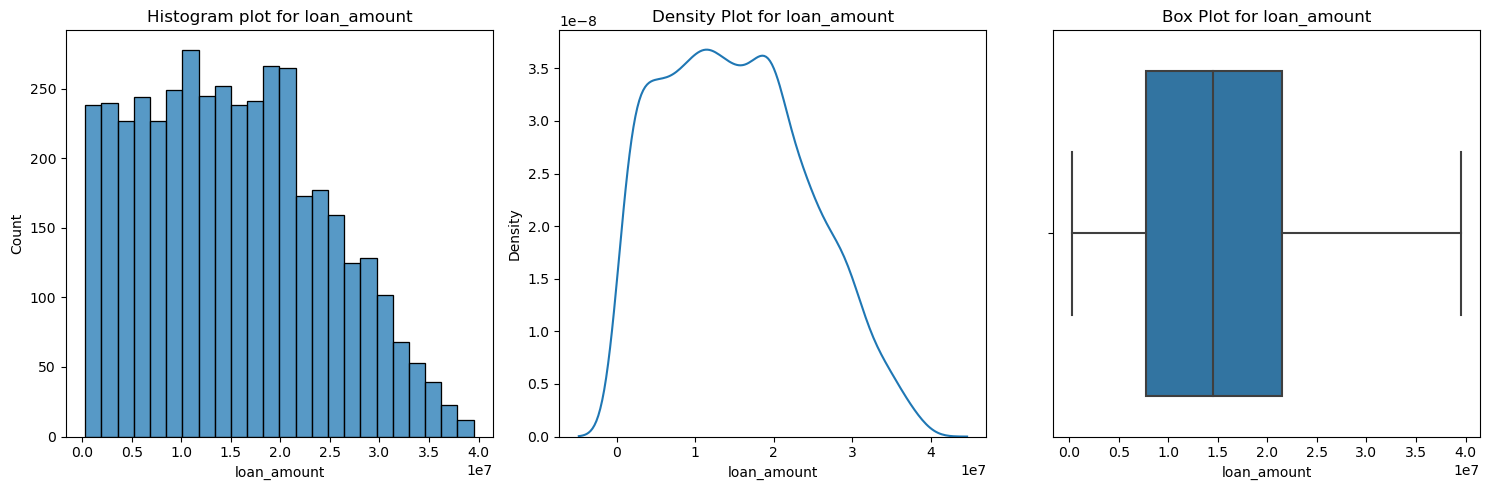

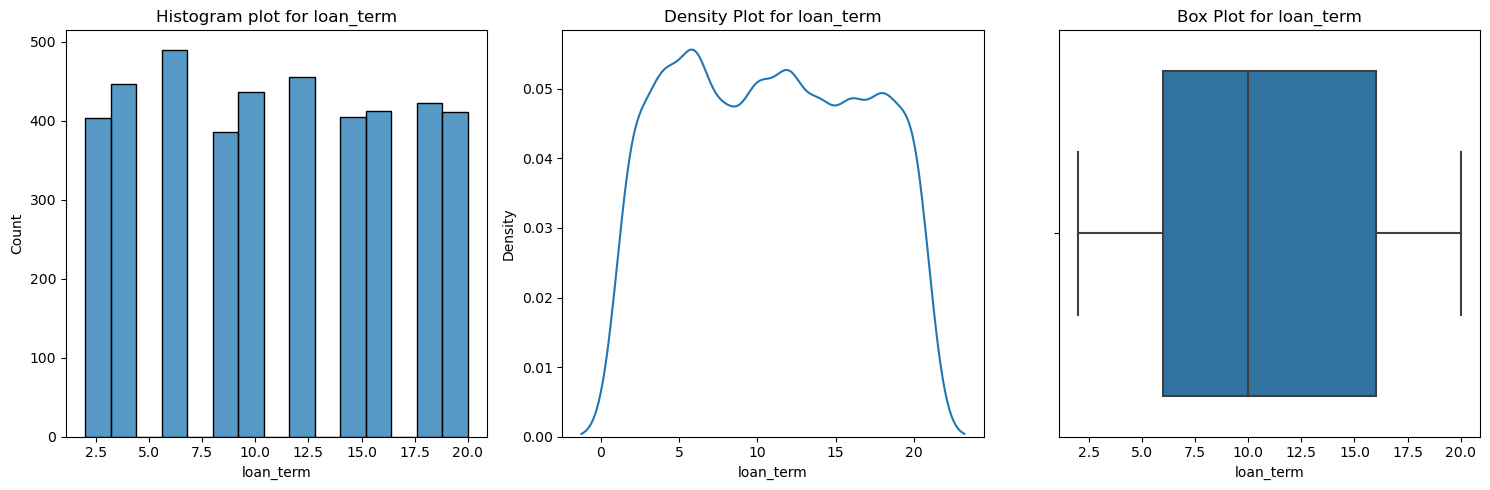

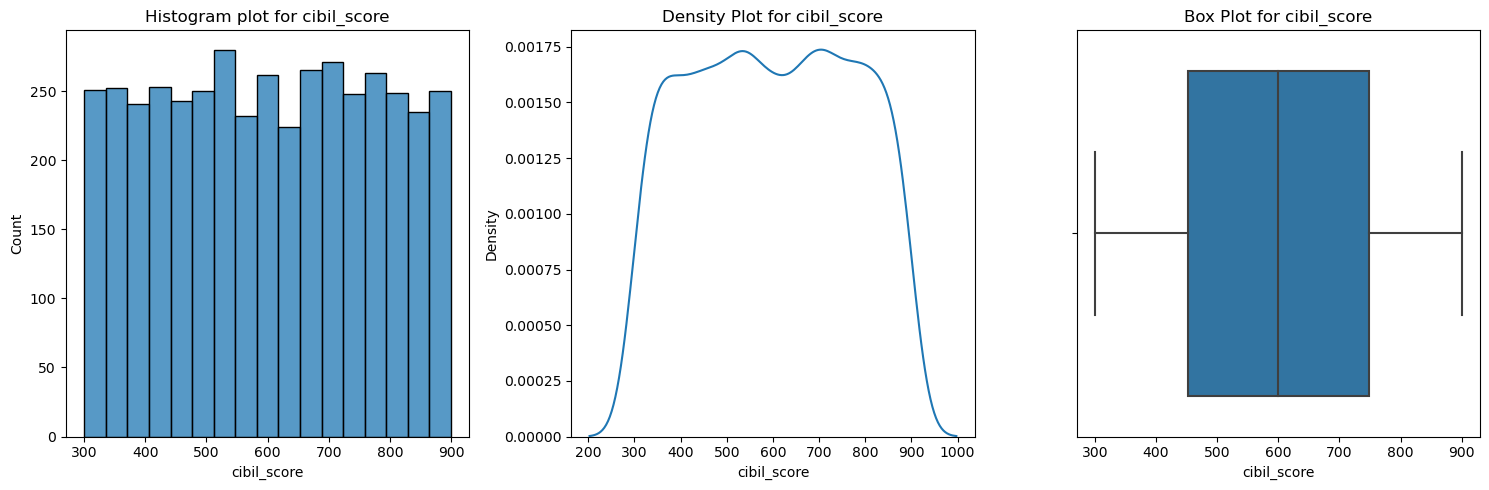

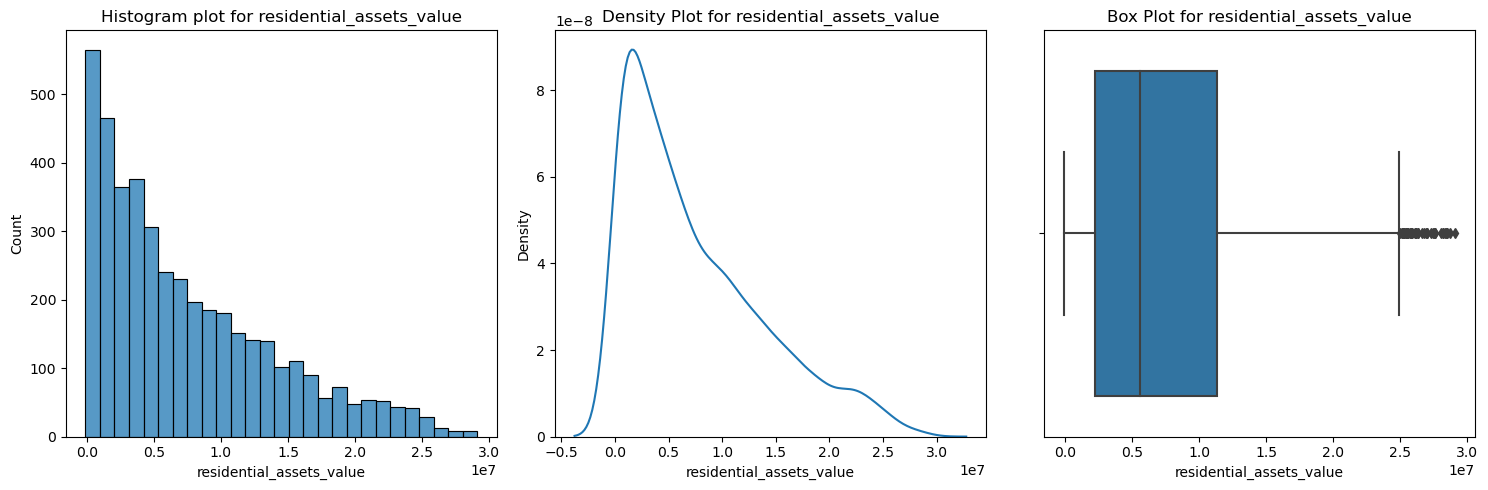

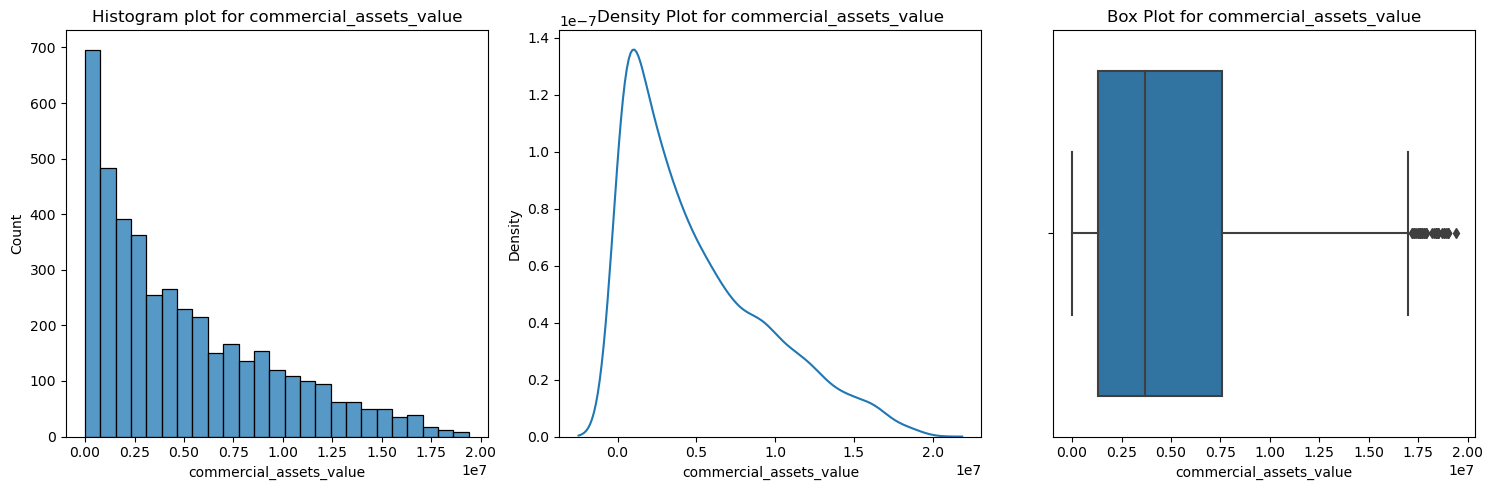

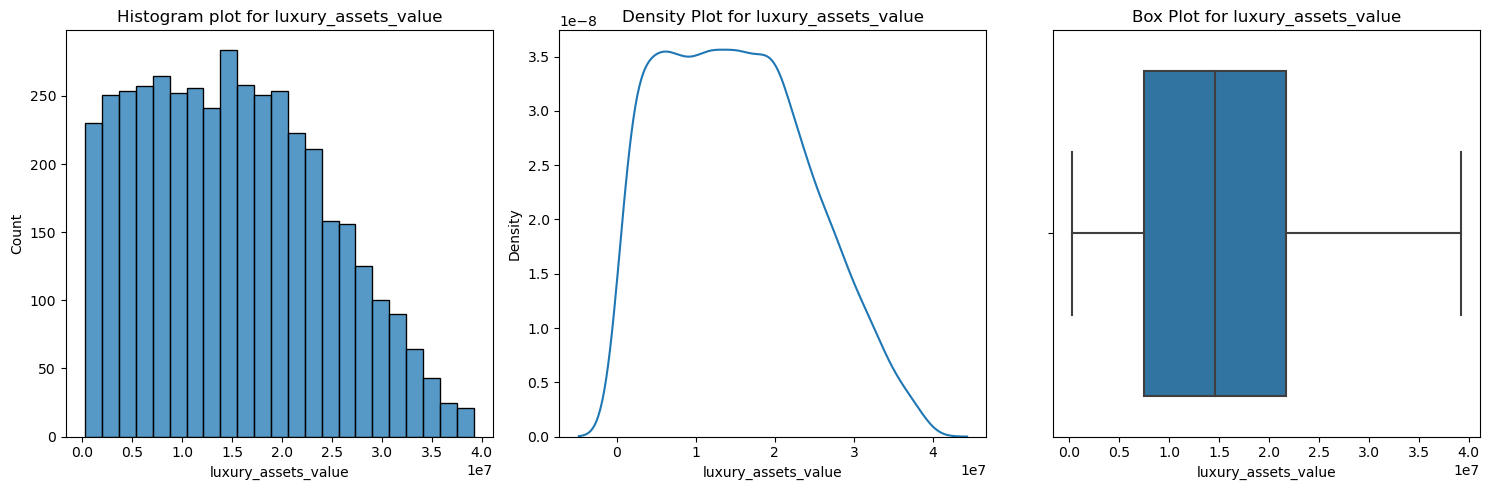

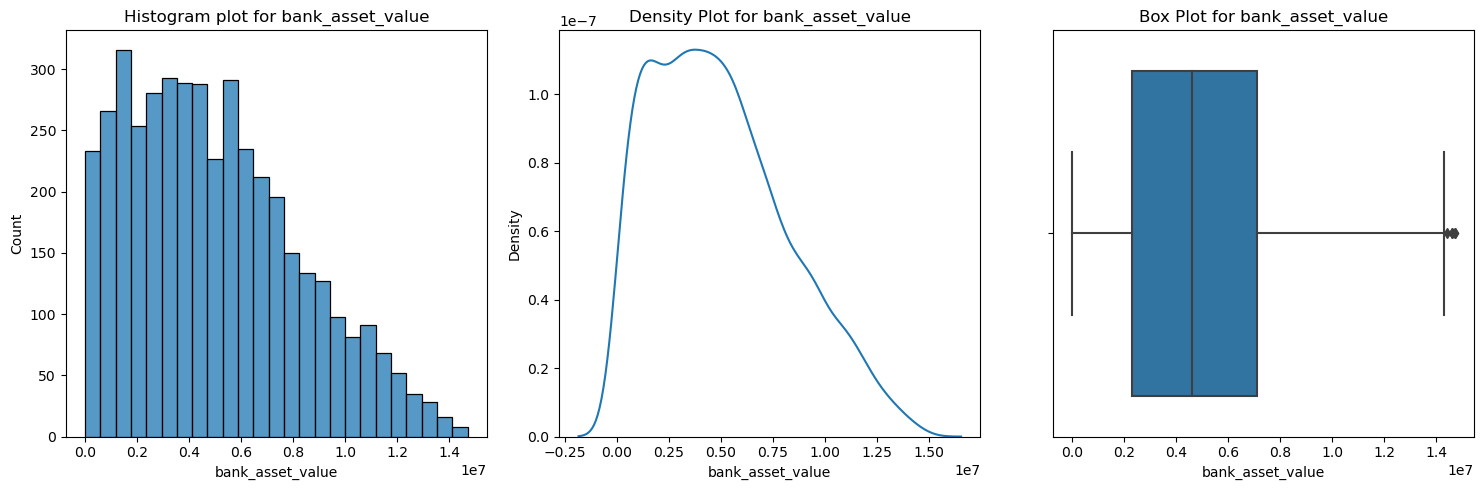

In [22]:
for i in df_num:
    figure , ax = plt.subplots(ncols = 3 , figsize = (15,5))
    sns.histplot(ax = ax[0] , x = i , data = df_num)
    ax[0].set_title(f"Histogram plot for {i}")
    sns.kdeplot(ax = ax[1] , x = df[i])
    ax[1].set_title(f"Density Plot for {i}")
    sns.boxplot(ax = ax[2] , x = i , data = df_num)
    ax[2].set_title(f"Box Plot for {i}")
    plt.tight_layout()

In [23]:
## skewness for all numrical columns for checking the shape of the columns

skew = {}
for i in df_num:
    temp = df_num[i].skew()
    skew[i] = temp

In [24]:
skew

{'no_of_dependents': -0.01797054296784964,
 'income_annum': -0.012814425096650109,
 'loan_amount': 0.30872388482299223,
 'loan_term': 0.036358907356478495,
 'cibil_score': -0.009039277330065707,
 'residential_assets_value': 0.9784505965115631,
 'commercial_assets_value': 0.9577908874986114,
 'luxury_assets_value': 0.3222075028955774,
 'bank_asset_value': 0.5607250089736816}

In [25]:
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

### Conclusions (Univariate Analysis for Numerical Columns)

(1). residential_assets_value , commercial_assets_value , bank_asset_value columns contains Outliers

(2). no_of_dependents , income_annum , loan_term , cibil_score columns are normally distributed.

(3). loan_amount , residential_assets_value , commercial_assets_value , luxury_assets_value , bank_asset_value are almost normally distributed.

(4). None of the Numerical columns contain NULL values

### Univariate Analysis for Categorical Columns

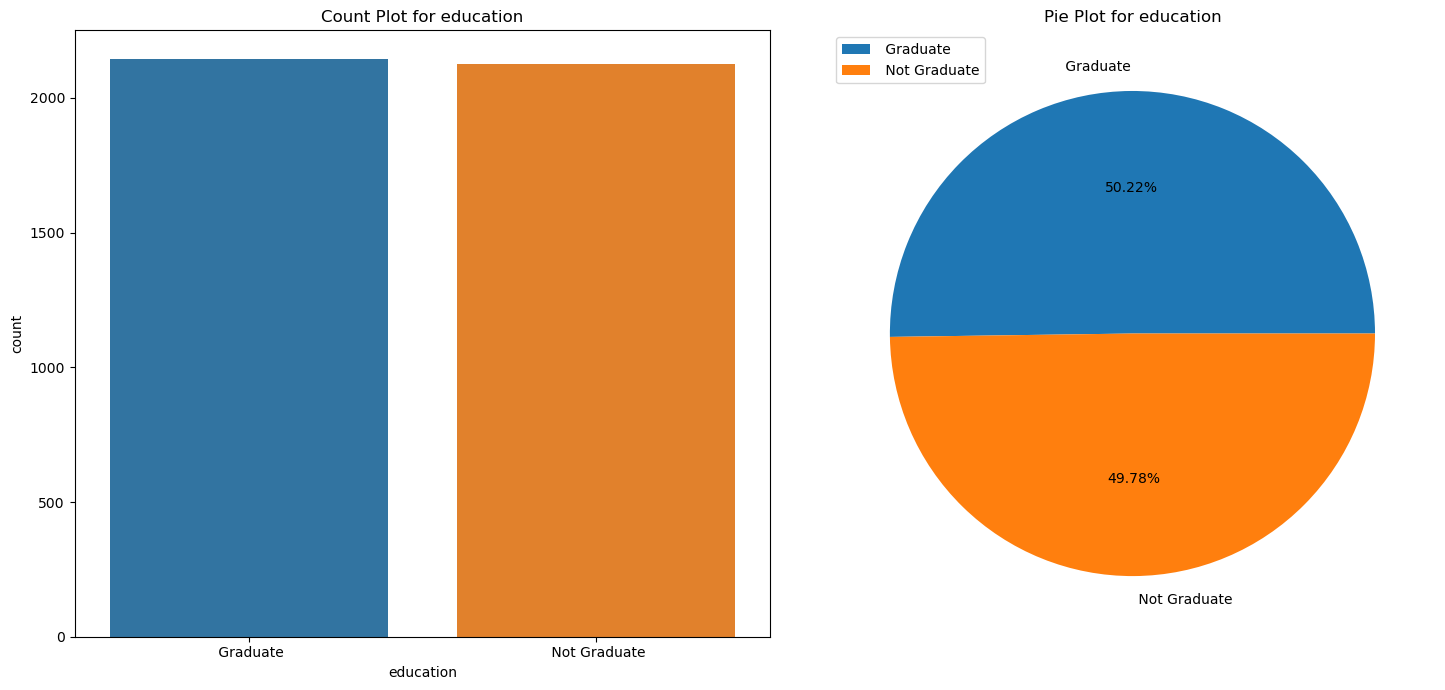

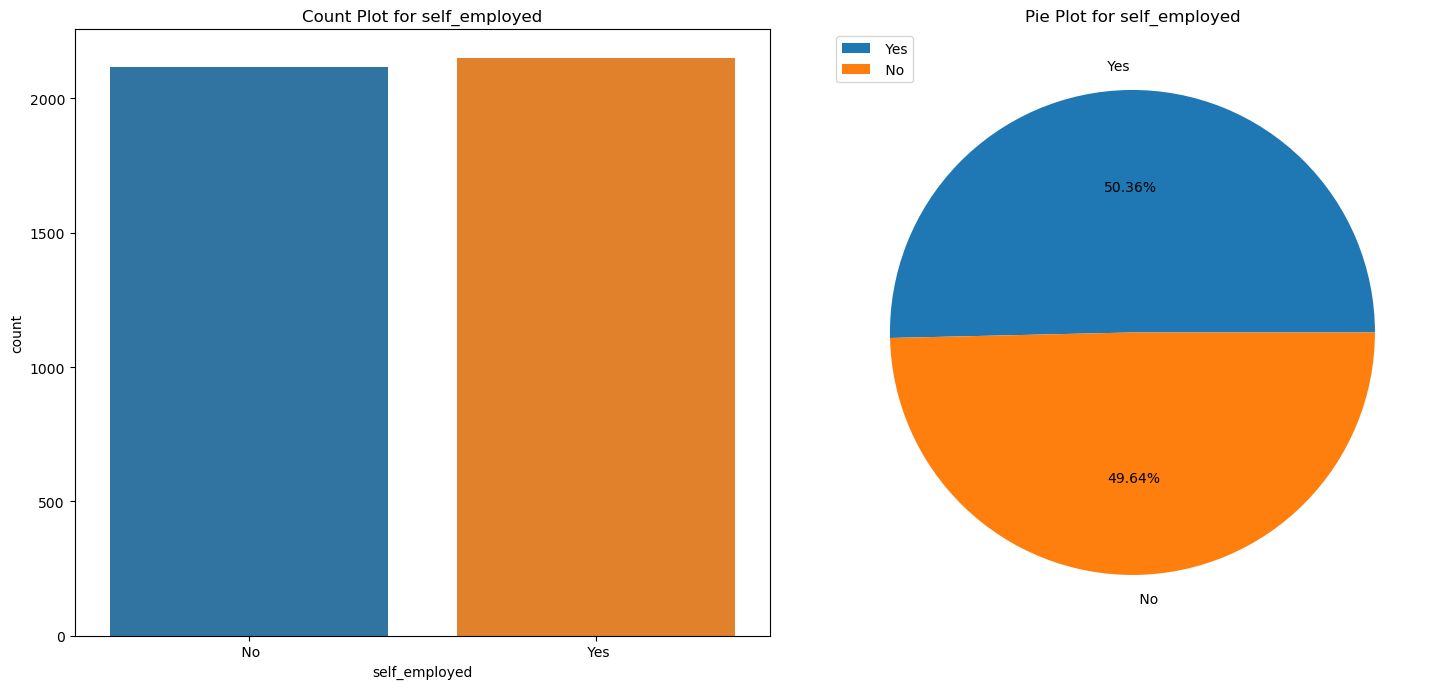

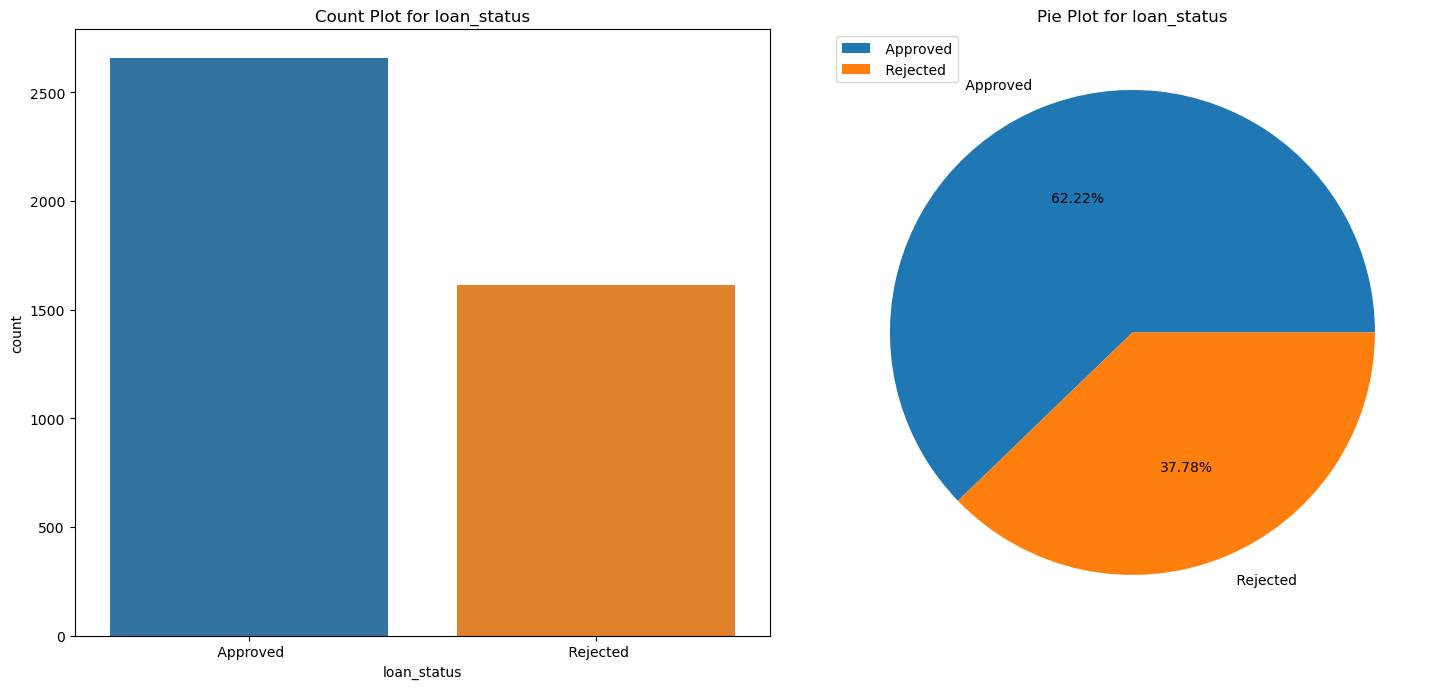

In [26]:
for i in df_cat:
    figure,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))
    sns.countplot(ax = ax1, x = i , data = df_cat)
    ax1.set_title(f"Count Plot for {i}")
    count = df[i].value_counts()
    labels = df[i].value_counts().index
    ax2.pie(labels = labels , x = count , data = df_cat , autopct = '%0.2f%%')
    plt.legend(loc = 'upper left')
    ax2.set_title(f"Pie Plot for {i}")
    plt.tight_layout()

### Conclusions (Univariate Analysis for Categorical Columns)

(1).None of the Categorical Column Contains NULL values.

(2). For Gender Column percentage or count of male is fairly Same as compare to female.

(3). For Self_Employed Column Percentage or Count of Self Employed is fairly Same as Compare to Not Self Employed.

(4). loan_status which is about 62.2% "Approved" and 37.7% Data is about "Rejected". The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.

## Bi-Variate Analysis

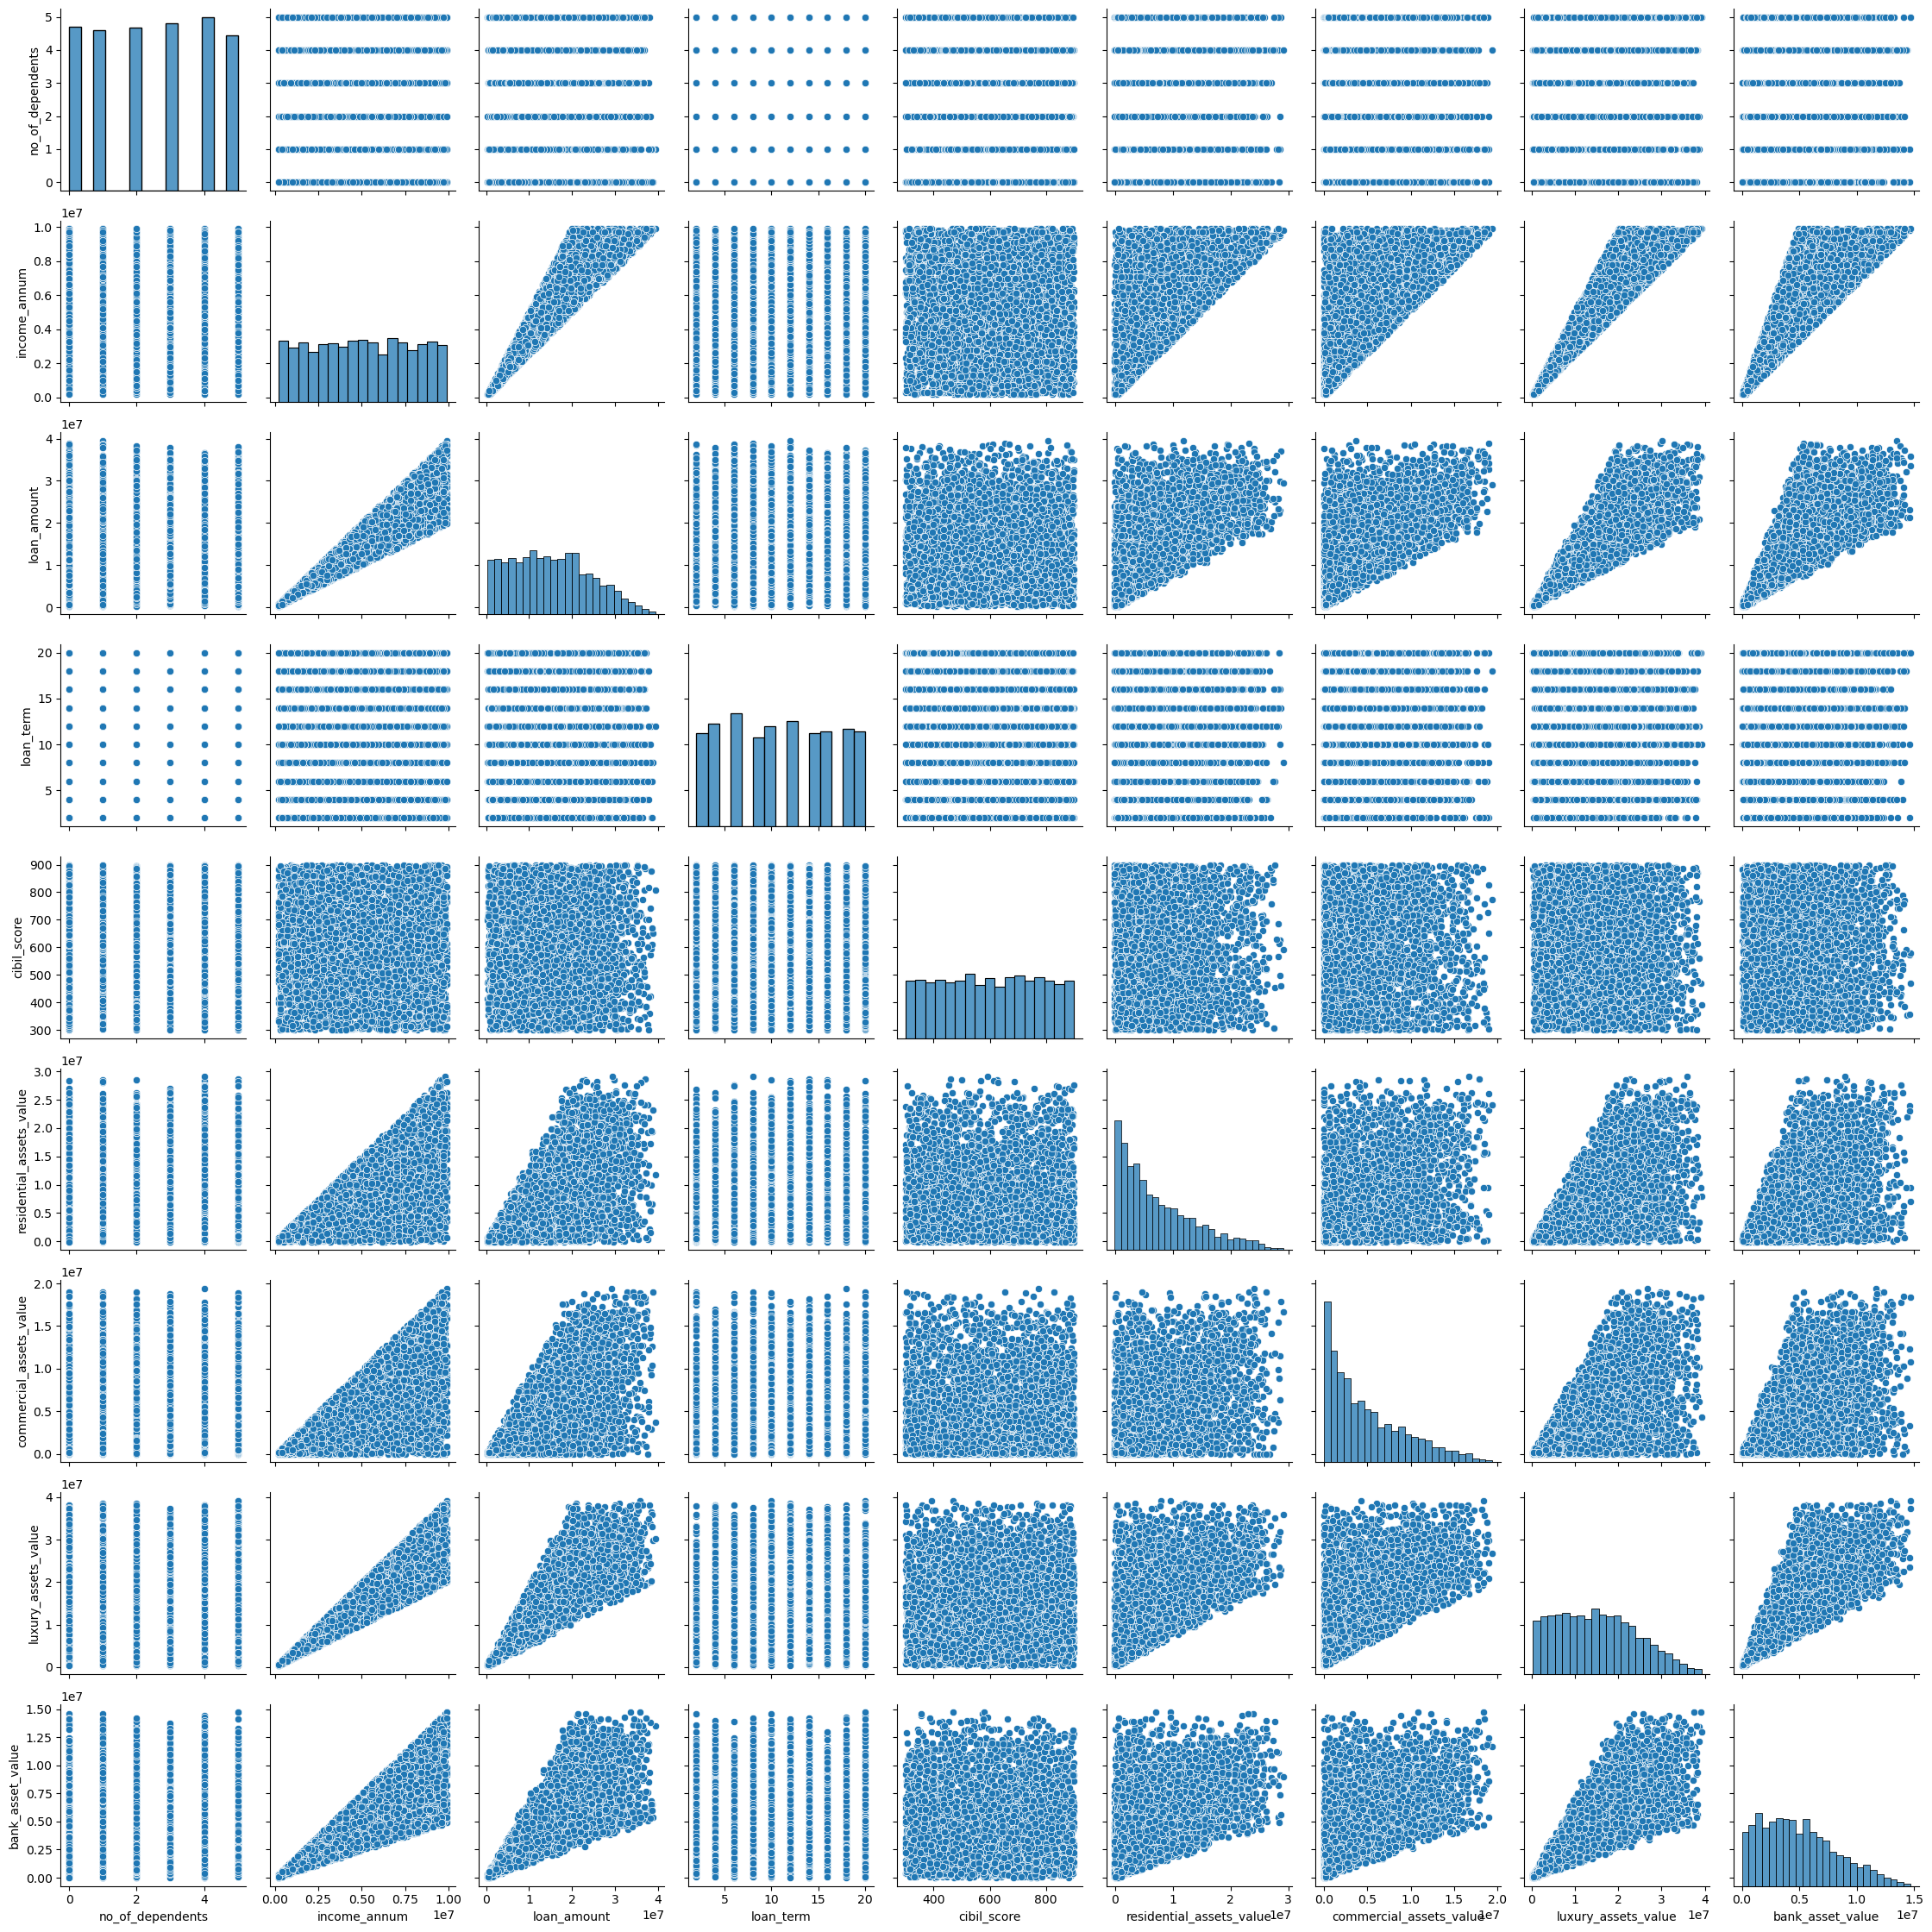

In [27]:
## Numerical columns vs Numerical Columns 

sns.pairplot(df_num)
plt.tight_layout()

#### (1). Loan_Amount

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

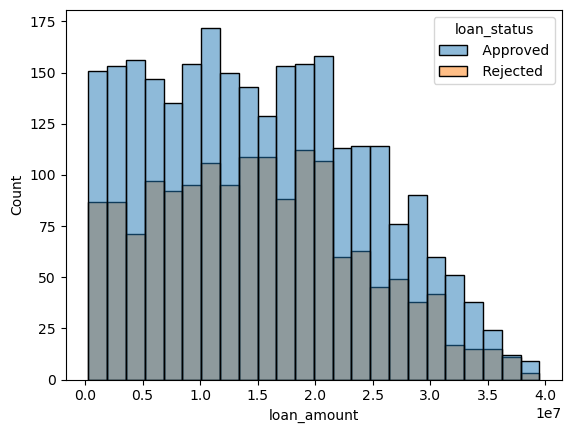

In [28]:
## Checking Relation between loan_amount vs loan_status  

sns.histplot(data = df , x = 'loan_amount' , hue = 'loan_status')

##### Conclusion 

It is interesting to see both approved and rejected loans have the same trends based on the different loan amounts, we haven't seen a strong relationship between the loan status and the loan amount in the histogram lets check for annual income.

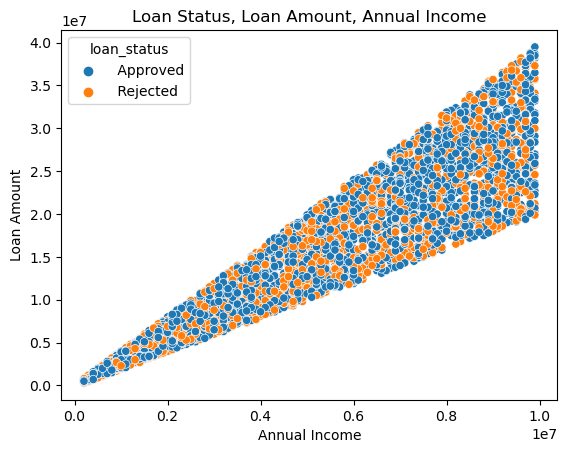

In [30]:
##Checking relationship between loan_amount with annual_income with respect to loan_status 

sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

#### Conclusion 
There are some interesting insights we have seen over the above figure:

(1). When annual income increases, the loan amount tends to increase.

(2). In this dataset, the applicants who have the lower annual income have a narrow range in loan amounts. Vise Versa, the applicants who have the higher lower annual income have a wider range in the loan amounts.

(3). In this dataset, the applicants who has highest annual income has been approved when they apply for the highest loan amount (see the upper right corner of the figure), but at the same time, the applicants who have the highest annual income have chances of being rejected when they apply lower loan amount (see the middle right of the figure/lower right of the triangle). It can be caused by different lenders and other conditions of the applicants.

In [71]:
## Lets Validate Our Assumption 

df.loc[(df['income_annum'] == df['income_annum'].max()) & (df['loan_status'] ==' Rejected')]

## yes our assumption is correct people having more salary and are applying for low amount of loan they will get rejected

no_of_dependents      education self_employed  income_annum  \
82                   2   Not Graduate           Yes       9900000   
157                  5   Not Graduate           Yes       9900000   
1179                 5       Graduate            No       9900000   
1272                 5   Not Graduate            No       9900000   
1409                 3       Graduate           Yes       9900000   
1547                 1       Graduate           Yes       9900000   
1890                 5       Graduate            No       9900000   
2862                 4       Graduate            No       9900000   
2869                 4       Graduate            No       9900000   
3000                 1   Not Graduate           Yes       9900000   
3548                 2   Not Graduate            No       9900000   
4191                 2       Graduate           Yes       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
82       21200000         16          363                  25500000   
157      33300000          6          364                   5300000   
1179     35700000         10          392                   7900000   
1272     35800000         20          470                   9500000   
1409     29900000         20          490                  10500000   
1547     34100000         14          371                  24400000   
1890     24600000          2          530                  24200000   
2862     30000000         18          496                  10400000   
2869     26100000          2          481                  14500000   
3000     25700000          2          340                  15600000   
3548     19900000          6          312                  21400000   
4191     37300000          8          385                    600000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
82                   11400000             26600000           6800000   
157                  18700000             27800000           8300000   
1179                  4300000             39200000          13000000   
1272                 18400000             39100000          14700000   
1409                  9100000             27100000           7400000   
1547                  7100000             29300000           6200000   
1890                 12800000             20400000          13000000   
2862                  8000000             29300000          13800000   
2869                  5000000             23600000           9300000   
3000                 18800000             29500000          11800000   
3548                  2200000             31400000          11000000   
4191                   900000             27400000          14200000   

     loan_status  
82      Rejected  
157     Rejected  
1179    Rejected  
1272    Rejected  
1409    Rejected  
1547    Rejected  
1890    Rejected  
2862    Rejected  
2869    Rejected  
3000    Rejected  
3548    Rejected  
4191    Rejected

#### Conclusion 

we have noticed that applicants who have the highest annual income tried to apply for a lower loan amount, but were rejected by the lenders. By checking up the subset (showing above), we confirm that the loan amount is not the main reason that causes their applications to be rejected. Taking a closer look , I see their credit scores (cibil_score) are considered as "Poor".
According to Equifax, the standard of the credit scores are: 300-579: Poor. 580-669: Fair. 670-739: Good. 740-799: Very good.

Resource: https://www.equifax.com/personal/education/credit/score/what-is-a-credit-score/#:~:text=300%2D579%3A%20Poor,740%2D799%3A%20Very%20good

So, Now Look At the Credit Score

#### (2). Credit Score

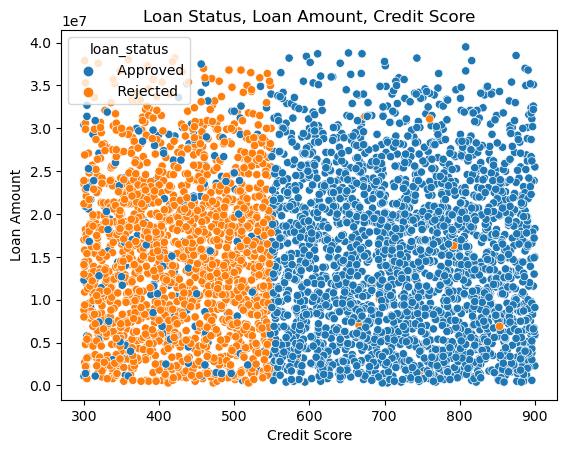

In [55]:
##Checking relationship between loan_amount with credit Score with respect to loan_status 

sns.scatterplot(x=df['cibil_score'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

#### Conclusion

credit scores around 540 - 550 separate the loan status into two parts in a very clear way. 
    
    In the other words, the loan status is highly related to the credit score.
    
It is also interesting to see the poor credit scores which are above 540 - 550 still have a good chance of being approved by loan lenders.

However, i also notice a Trubble trend: 

some of the applicants with high credit scores (above 740) were still rejected. Few of them have only applied for a small amount of the loan which is below the median amount. 

    What is the reason? Lets Check this and validate our Assumption 

In [59]:
## Lets Validate Our Assumption 

df.loc[(df['cibil_score'] > 740) & (df['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)

no_of_dependents      education self_employed  income_annum  \
559                  2       Graduate           Yes        200000   
3527                 0       Graduate            No       1800000   
911                  0       Graduate           Yes       1300000   
3213                 1   Not Graduate           Yes       4300000   
236                  3       Graduate           Yes        900000   
4099                 3       Graduate            No       8700000   
1446                 1       Graduate            No        300000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
559        500000          6          885                   -100000   
3527      6900000         10          853                    900000   
911       4800000          4          835                    500000   
3213     16300000         14          792                    400000   
236       3500000          4          770                    700000   
4099     31100000         16          760                    400000   
1446      1200000         18          747                    100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
559                         0               300000            200000   
3527                   400000              3700000           1700000   
911                    100000              3300000            800000   
3213                   400000             10200000           4000000   
236                         0              2000000            600000   
4099                  1800000             19300000           4800000   
1446                        0               700000            200000   

     loan_status  
559     Rejected  
3527    Rejected  
911     Rejected  
3213    Rejected  
236     Rejected  
4099    Rejected  
1446    Rejected

#### Conclusion

By creating the subset, we have more than 5 applicants with more than 740 credit scores, their applications were rejected.
In order to discover more reasons, there are 4 features that take my attention, they are residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value. Since we are not able to find the description of these 4 variables from the dataset, let's do some research and see what they are.



#### (3).  residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value

According to investopedia.com: "Asset valuation is the process of determining the fair market value of an asset."
Resource: 

https://www.investopedia.com/terms/a/assetvaluation.asp#:~:text=Key%20Takeaways-,Asset%20valuation%20is%20the%20process%20of%20determining%20the%20fair%20market,less%20intangible%20assets%20and%20liabilities.


As we are not able to find the clear definitions of those asset values on Google, but ChatGPT helped us out:
"Based on the description you've provided, I can offer some general interpretations for the variables you mentioned:

Residential Assets Value: This is likely a measure of the total value of residential properties or real estate assets owned by the individuals or organizations in the dataset.

Commercial Assets Value: This could represent the total value of commercial properties or business-related assets owned by the individuals or organizations in the dataset. Commercial properties might include office buildings, retail spaces, warehouses, and similar assets.

Luxury Assets Value: This might refer to the total value of high-end or luxury items owned by the individuals or organizations. These could include items such as luxury vehicles, valuable artwork, jewelry, and other premium possessions.

Bank Asset Value: This is possibly the total value of assets held by the bank or lending institution itself. It might include cash reserves, investments, and other financial assets."



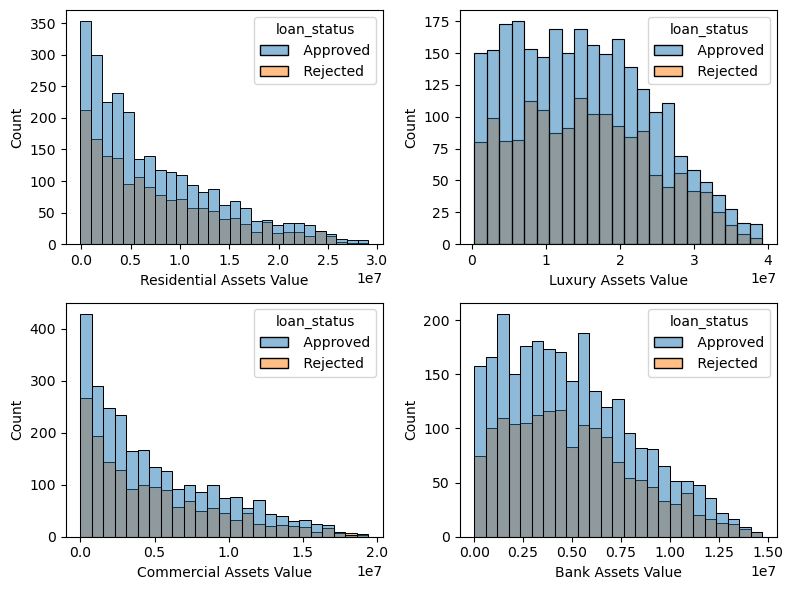

In [61]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(df, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

#### Conclusion 

Here we can't see the greater relationship between these assets with loan status lets draw heatmap

<AxesSubplot:>

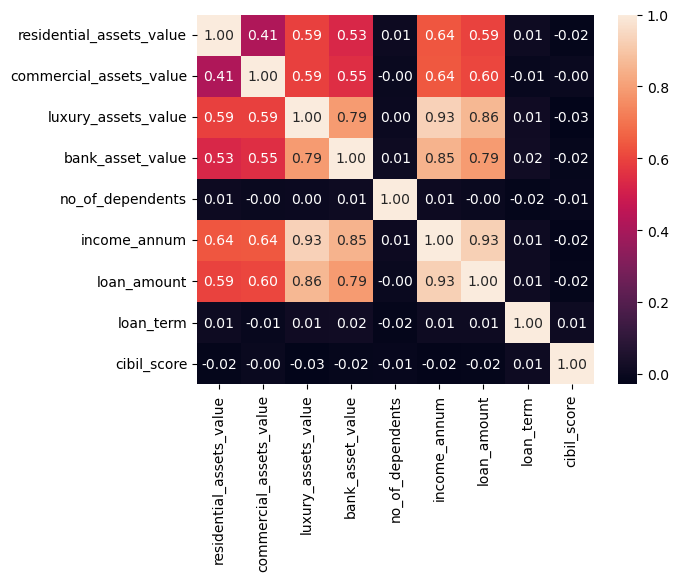

In [65]:
loan_asset = df[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_status']]
loan_asset_corr = loan_asset.corr()
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f")

#### Conclusion 

Now we can see some insights through the heatmap:

All the asset values have moderate to strong positive linear relationships with the annual income. As the applicants who have more annual income tend to have more flexibility on purchasing the properties with higher asset values especially the luxury assets value.


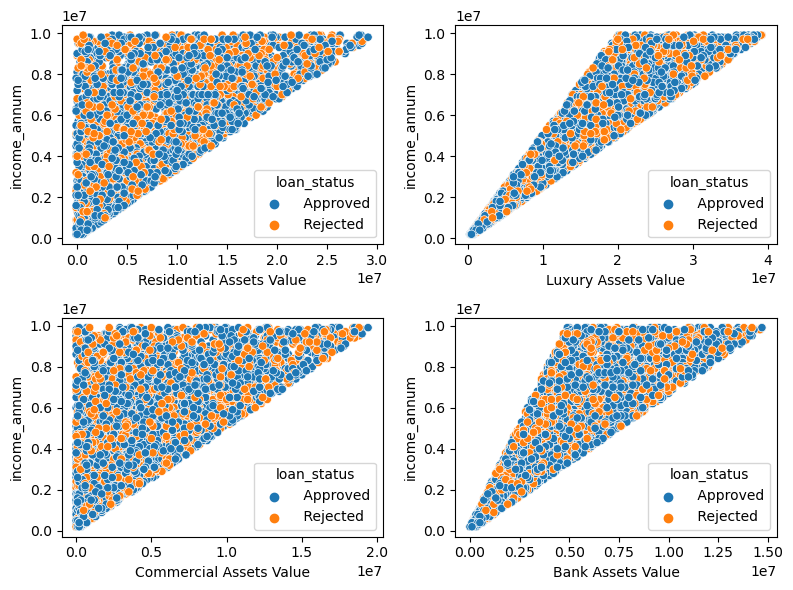

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.scatterplot(data=df, x='residential_assets_value', y='income_annum', hue='loan_status', ax=axes[0, 0])
axes[0, 0].set_xlabel("Residential Assets Value")

sns.scatterplot(data=df, x='commercial_assets_value', y='income_annum', hue='loan_status', ax=axes[1, 0])
axes[1, 0].set_xlabel("Commercial Assets Value")

sns.scatterplot(data=df, x='luxury_assets_value', y='income_annum', hue='loan_status', ax=axes[0, 1])
axes[0, 1].set_xlabel("Luxury Assets Value")

sns.scatterplot(data=df, x='bank_asset_value', y='income_annum', hue='loan_status', ax=axes[1, 1])
axes[1, 1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()


#### Conclusion

We can see, both of residential_assets_value, commercial_assets_value create right triangles on the scatter plots, cutting the plot into two sections. This indicates that the relationship between annual income and these asset values might have some sort of threshold effect. For example, once the asset value reaches a certain point, the annual income tends to increase significantly.

The obtuse triangles we are seeing for luxury_assets_value, bank_asset_value suggest have a different type of relationship. The smaller triangle for luxury assets value compared to bank asset value might indicate that while there's a strong correlation between luxury assets value and annual income, there's a higher variability in annual income for any given luxury assets value. In other words, luxury assets might be a good indicator of higher annual income.

#### (4). Loan Term

In [72]:
cross_loan_term = pd.crosstab(index=df['loan_term'], columns=df['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status   Approved   Rejected  Total  Approved_percentage  \
loan_term                                                       
2                  315         89    404            77.970297   
4                  366         81    447            81.879195   
6                  282        208    490            57.551020   
8                  220        166    386            56.994819   
10                 229        207    436            52.522936   
12                 276        180    456            60.526316   
14                 239        166    405            59.012346   
16                 236        176    412            57.281553   
18                 257        165    422            60.900474   
20                 236        175    411            57.420925   

loan_status  Rejected_percentage  
loan_term                         
2                      22.029703  
4                      18.120805  
6                      42.448980  
8                      43.005181  
10                     47.477064  
12                     39.473684  
14                     40.987654  
16                     42.718447  
18                     39.099526  
20                     42.579075

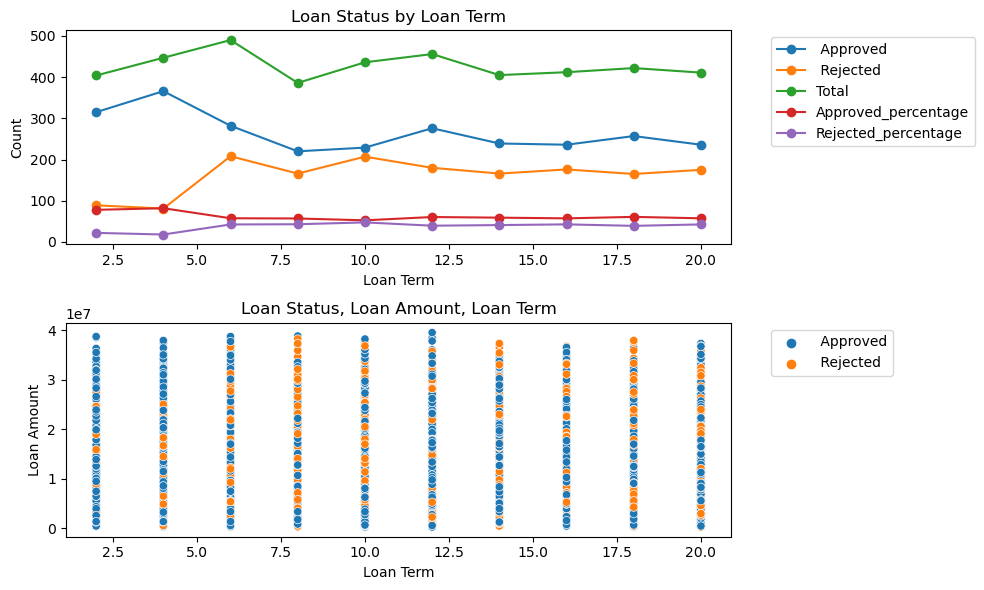

In [91]:
fig,axes = plt.subplots(2,1, figsize=(10,6))
cross_loan_term.plot(kind='line', marker='o', ax = axes[0])
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].set_title('Loan Status by Loan Term')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

sns.scatterplot(data = df, x = 'loan_term', y = 'loan_amount', hue = 'loan_status', ax = axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0) , loc='upper left')

plt.tight_layout()
plt.show()

#### Conclusion 

The total observations for each of the loan terms are very even, we appreciate the owner of this dataset, so we can analyze the data much easier without worrying about the balancing.

The shortest loan term in this dataset, which is 2 years, gets the one of the most chances for being approved by the lenders, compared to other loan terms, except the 4 years loan term which gets the most chances for being approved.

When the loan term is more than 4 years, the chance of being rejected have significantly increased, vise versa, the chance of being approved have dropped. Until the loan term equals to 8, both chances of being approved and rejected are tended to be normal. When the loan term reaches the 10 years, it is a loan term whose chance of being approved and rejected are approximately the same. After 10 years, the trend is becoming more consistent and the chance of being approved is slightly higher than the chance of being rejected.


In [93]:
### Lets Validate Our Assumption 

df.loc[(df['loan_term'] <=4) & (df['loan_status'] ==' Rejected')].sort_values(['loan_amount']).head(10)

no_of_dependents      education self_employed  income_annum  \
1388                 4       Graduate           Yes        300000   
1061                 3   Not Graduate            No        300000   
3393                 5   Not Graduate            No        300000   
1199                 2   Not Graduate            No        300000   
949                  2       Graduate           Yes        300000   
853                  3   Not Graduate            No        300000   
519                  2       Graduate           Yes        500000   
2643                 4       Graduate            No        600000   
1012                 5       Graduate           Yes        500000   
3475                 5   Not Graduate            No        700000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1388       500000          2          353                    600000   
1061       500000          2          477                    700000   
3393       600000          4          418                    500000   
1199       600000          2          383                    600000   
949        700000          4          411                    600000   
853        800000          2          458                    500000   
519       1300000          4          427                   1400000   
2643      1400000          4          507                    200000   
1012      1400000          4          471                    500000   
3475      1400000          4          344                   1500000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1388                   100000              1200000            400000   
1061                   200000               800000            400000   
3393                   200000               700000            200000   
1199                   300000              1100000            400000   
949                         0              1200000            100000   
853                         0              1100000            200000   
519                    500000              1800000            600000   
2643                   300000              1700000            400000   
1012                   100000              1300000            300000   
3475                   800000              2600000            300000   

     loan_status  
1388    Rejected  
1061    Rejected  
3393    Rejected  
1199    Rejected  
949     Rejected  
853     Rejected  
519     Rejected  
2643    Rejected  
1012    Rejected  
3475    Rejected

#### (5).  Number of dependents¶

Let's take a look at if the number of dependents have any relationship with the loan status by using the crosstab function.

In [94]:
cross_dependents = pd.crosstab(index=df['no_of_dependents'], columns=df['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents

loan_status        Approved   Rejected  Approved_percentage  \
no_of_dependents                                              
0                       457        255            64.185393   
1                       430        267            61.692970   
2                       441        267            62.288136   
3                       457        270            62.861073   
4                       465        287            61.835106   
5                       406        267            60.326895   

loan_status       Rejected_percentage  
no_of_dependents                       
0                           35.814607  
1                           38.307030  
2                           37.711864  
3                           37.138927  
4                           38.164894  
5                           39.673105

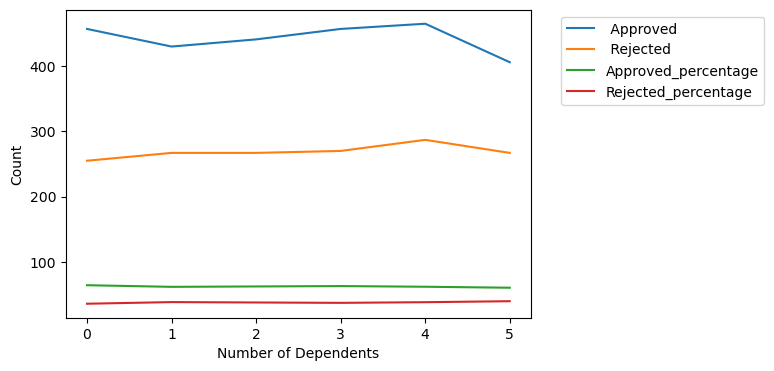

In [102]:
plt.figure(figsize = (6,4))
sns.lineplot(data=cross_dependents, dashes=False)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


#### (6). Education


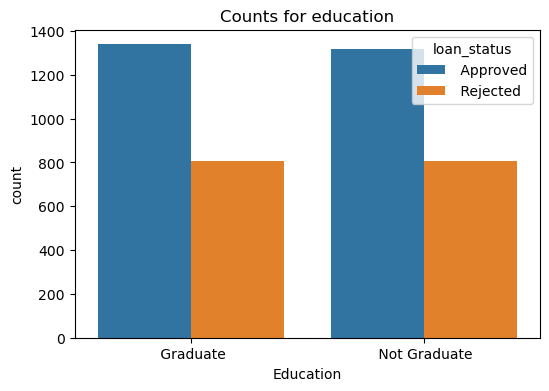

In [106]:
plt.figure(figsize = (6,4))
sns.countplot(data =df, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

The counts based on different education status are approximately the same.
In addition, on the description page of this dataset, "education: Education of the Applicant (Graduate/Not Graduate)". We have to put a question mark here, if the education means high-school education or college education?

In [111]:
education = df.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)
education

education  count_by_education  median_annual_income  \
0       Graduate                2144             5100000.0   
1   Not Graduate                2125             5000000.0   

   average_loan_amount  average_credit_score  average_loan_term  \
0          15229151.12                599.14              10.85   
1          15036894.12                600.74              10.95   

   avg_residential_value  avg_commerical_value  avg_luxury_value  \
0             7543376.87            4943610.07       15239319.03   
1             7401223.53            5002964.71       15012282.35   

   avg_bank_value  
0      5007182.84  
1      4945929.41

####  Conclusion 

Their is no major difference of Graduate with other features 

#### (7). Self Employed


In [112]:
self_employed = df.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

self_employed

self_employed  count  median_annual_income  average_loan_amount  \
0            No   2119             5100000.0          15120245.40   
1           Yes   2150             5100000.0          15146465.12   

   average_credit_score  average_loan_term  avg_residential_value  \
0                600.78              10.88             7432373.76   
1                599.10              10.92             7512279.07   

   avg_commerical_value  avg_luxury_value  avg_bank_value  
0            5052713.54       15085842.38       4977395.0  
1            4894744.19       15166186.05       4976000.0

#### Conclusion 

Same thing as the self_employed - there are no significant differences between the self_employed and other variables in this dataset.


## Multi-Variate Analysis 

<AxesSubplot:>

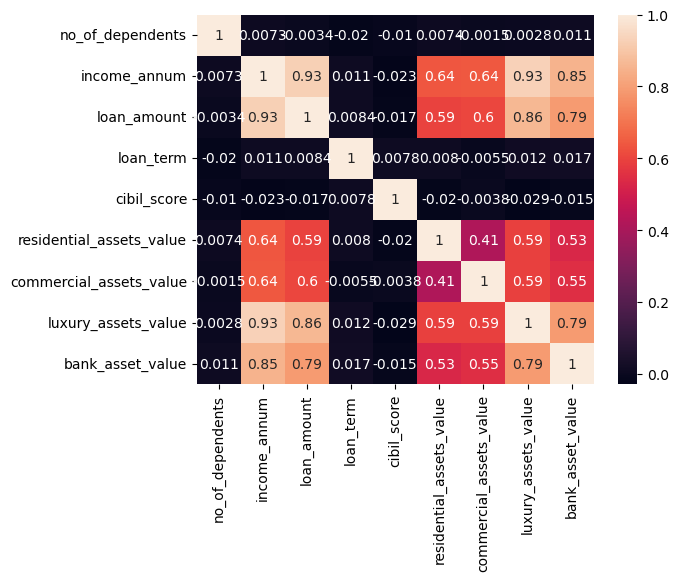

In [113]:
## Making Heat Map for MultiVariate Analysis

sns.heatmap(df.corr(),annot=True)